# Create, draw and fit a 2DGraphErrors
Ported to Notebook by: Theis Hansaen

In [1]:
import ROOT 

Welcome to JupyROOT 6.24/08


### Build, fIt and draw a 2D graph
To start off we set the style and palette of the graph.

In [2]:
%%cpp
gStyle->SetPalette(kBird);
double e = 0.3;
int nd = 500;

Here we are starting to fill our Graph with a function, and we use the TF2 Type because we want our function to be bidimensional.

In [3]:
%%cpp
TRandom3 my_random_generator;
TF2 f2("f2","1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+200",-6,6,-6,6);
f2.SetParameters(1,1);
TGraph2DErrors dte(nd);

We use TRandom3 (seen above) to generate random numbers in [-e,e]

In [4]:
%%cpp
double rnd, x, y, z, ex, ey, ez;
for (Int_t i=0; i<nd; i++){
    f2.GetRandom2(x,y);
    rnd = my_random_generator.Uniform(-e,e);
    z = f2.Eval(x,y)*(1+rnd);
    dte.SetPoint(i,x,y,z);
    ex = 0.05*my_random_generator.Uniform();
    ey = 0.05*my_random_generator.Uniform();
    ez = fabs(z*rnd);
    dte.SetPointError(i,ex,ey,ez);
}

Warning in <TF2::GetRandom2>: function:f2 has 24 negative values: abs assumed


We set the function's parameters to set the initial values for the fit with the graph. We also make our function more visualy attractive by setting the line to fit our preferences.

In [5]:
%%cpp
f2.SetParameters(0.7,1.5);
f2.SetTitle("Fitted 2D Function");
f2.SetLineWidth(1);
f2.SetLineColor(kBlue-5);
dte.Fit(&f2);

 FCN=517.445 FROM MIGRAD    STATUS=CONVERGED      38 CALLS          39 TOTAL
                     EDM=2.65702e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.81725e-01   4.37173e-01   2.40425e-05   8.08231e-04
   2  p1           1.46084e+00   9.36798e-01   5.15197e-05   3.78774e-04


We then set the axes, and plot the result of our function.

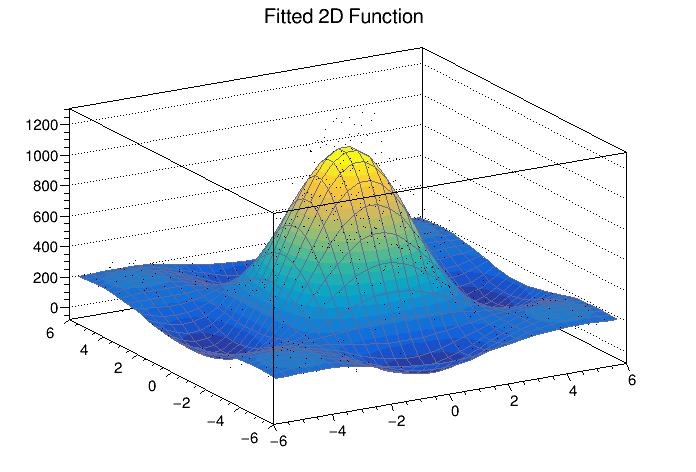

In [6]:
%%cpp
TCanvas c;
f2.DrawClone("Surf1");
auto Xaxis = f2.GetXaxis();
auto Yaxis = f2.GetYaxis();
auto Zaxis = f2.GetZaxis();
Xaxis->SetTitle("X Title"); Xaxis->SetTitleOffset(1.5);
Yaxis->SetTitle("Y Title"); Yaxis->SetTitleOffset(1.5);
Zaxis->SetTitle("Y Title"); Zaxis->SetTitleOffset(1.5);
dte.Draw("PO Same");
c.Draw();

To finish off, we make the x and y projections on a new canvas using the command new with the Type TCanvas.

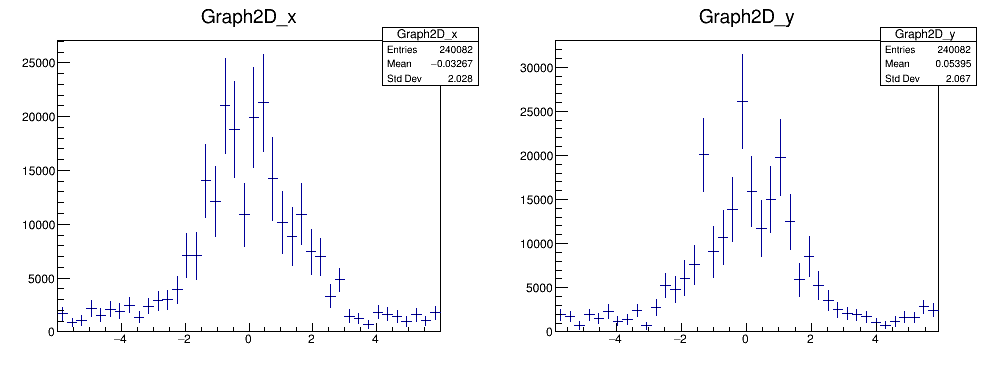

In [7]:
%%cpp
TCanvas c_p("ProjCan","The Projections",1000,400);
c_p.Divide(2,1);
c_p.cd(1);
dte.Project("x")->Draw();
c_p.cd(2);
dte.Project("y")->Draw();
c_p.Draw();